# Fiber Analysis; Modified from FiberFit Software
## software  is from [this paper](https://link.springer.com/article/10.1007/s10237-016-0776-3) and Github with original program can be viewed [here.](https://github.com/NTMatBoiseState/FiberFit/tree/master/src/fiberfit_model)
#### this software below is same as above, but it allows for bulk proccessing and provides potential for export of raw data and custom formatting of images

### Steps:  First, Upload your Images for analysis

In [1]:
from widgetsmp import s,run
from src.foruploading5 import ff,upload,prepimages
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output
from ipywidgets import interact, interact_manual
s = widgets.FileUpload(accept='', multiple=True)
upload(s)
s

C:\Users\asus\anaconda3\envs\test-environment\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


FileUpload(value={}, description='Upload', multiple=True, style=ButtonStyle(button_color='lightblue'))

### Next, Run Code. Output will be in "output" folder on home page. Can Download images and .csv from there (working on including .zip file download)

In [2]:
run(_)

Output()

### Next, if desired, run code below for color maps of fiber orientation and diameter thickness.  Again, output will be in "output" folder. 
###### Note: These color maps are from a program called Quanfima. To note - this is a method that utilizes alternative calculation method than above. It takes longer to calculate, but can be used qualitatively against csv + image outputs in above program to confirm if similar results.

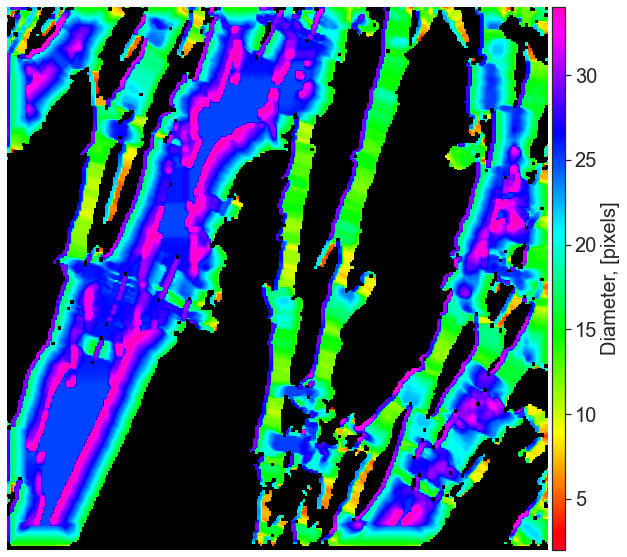

AttributeError: 'float' object has no attribute 'get_matrix'

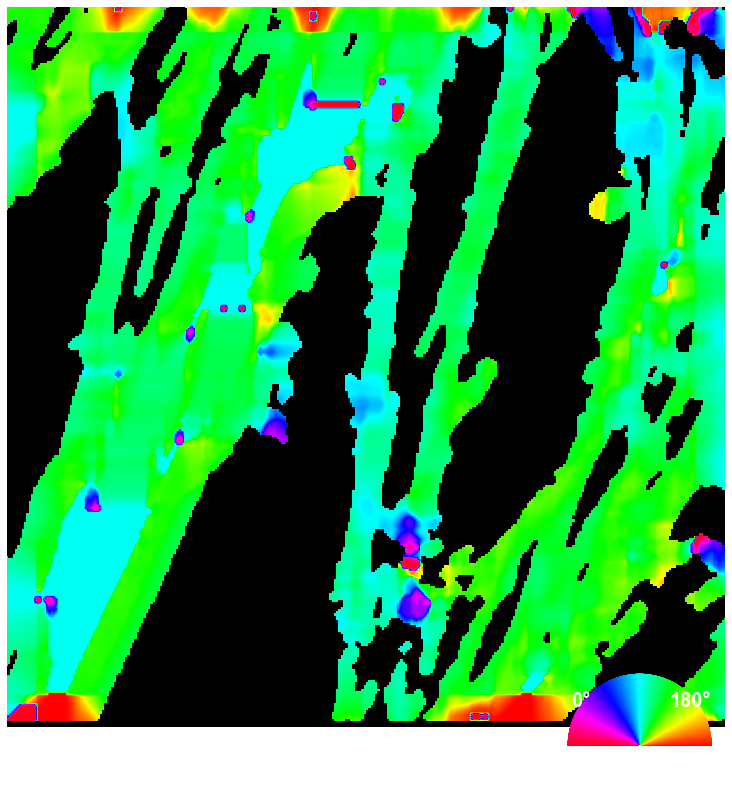

In [259]:
#from quanfima_torun11 import colormaps
#%matplotlib inline
#colormaps(orient_type='tensor')
import numpy as np
from skimage import io, filters
from quanfima.quanfima import morphology as mrph
from quanfima.quanfima import visualization as vis
#from quanfima.quanfima import utils

img_seg = cv2.imread('Data/segmented_square.png',0)

#th_val = filters.threshold_otsu(img)
#img_seg = (img > th_val).astype(np.uint8)

# estimate porosity
#pr = mrph.calc_porosity(img_seg)
#for k,v in pr.items():
#  print 'Porosity ({}): {}'.format(k, v)

# prepare data and analyze fibers
data = img_seg
skeleton = img_seg
skeleton_thick = img_seg
#skeleton, skeleton_thick = utils.prepare_data(img_seg)
cskel, fskel, omap, dmap, ovals, dvals = \
                    mrph.estimate_fiber_properties(data, skeleton)

# plot results
vis.plot_diameter_map(dmap, cskel, figsize=(10,10), cmap='gist_rainbow',
                      name='DIAMETER_estimate',
                      output_dir='output/')
vis.plot_orientation_map(omap, fskel, min_label=u'0°', max_label=u'180°',
                         figsize=(10,10),
                         name='ORIENTATION_estimate',
                         output_dir='output/')

### Code below is for easier export of data - not ready yet.

In [224]:
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv from within a Jupyter notebook"""
    numpy.savetxt(csv_file_name, df, delimiter=",")
    from IPython.display import FileLink
    display(FileLink(csv_file_name))
    if delete_prompt:
        a = input('Press enter to delete the file after you have downloaded it.')
        import os
        os.remove(csv_file_name)

In [225]:
csv_download_link(output, 'output.csv')

/home/jovyan/df.csv

Press enter to delete the file after you have downloaded it.
